In [115]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
X = np.array([1, 3, 5, 7, 9, 11])
w_x = 1.0
Y = np.array([9, 7, 5, 3, 1])
w_y = 2.0
count = np.array([
    [4, 0, 0, 0, 0, 0],
    [2, 3, 1, 1, 0, 0],
    [1, 1, 4, 2, 1, 0],
    [0, 2, 3, 3, 3, 3],
    [0, 0, 0, 1, 2, 3],
])

In [117]:
n = len(X)
m = len(Y)

x_count = count.sum(axis=0)
y_count = count.sum(axis=1)
total = x_count.sum()

x_sum = (X * x_count).sum()
x2_sum = (X ** 2 * x_count).sum()
y_sum = (Y * y_count).sum()
xy_sum = (Y.reshape(m, 1) @ X.reshape(1, n) * count).sum()

p = (total * xy_sum - x_sum*y_sum) / (total * x2_sum - x_sum ** 2)
b = (x2_sum * y_sum - x_sum * xy_sum) / (total * x2_sum - x_sum ** 2)

u_x = (X * x_count).sum() / total
u_y = (Y * y_count).sum() / total
u_y_from_x = (Y.reshape(1,m) @ count / x_count)
d_x = ((X-u_x) ** 2 * x_count).sum() / (total-1)
sigma_x = d_x ** 0.5
d_y = ((Y-u_y) ** 2 * y_count).sum() / (total-1)
sigma_y = d_y ** 0.5

r_xy = p * sigma_x / sigma_y
err = d_y * (1-r_xy**2)

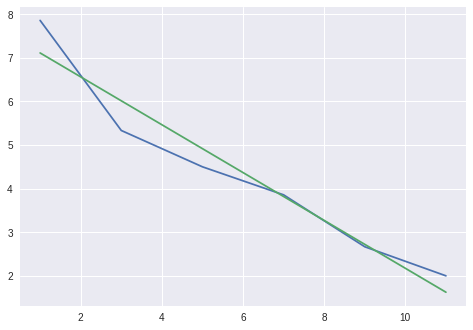

In [118]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(X, u_y_from_x.flatten('C'))
ax.plot([X[0], X[-1]], [X[0] * p + b, X[-1] * p + b])

In [119]:
info = f"""
    regression line: Y = {round(p, 3)}X + {round(b, 3)}
    E[Y|X] = {u_y_from_x.flatten('C').round(3)}

    E[X] = {round(u_x, 3)}
    E[Y] = {round(u_y, 3)}

    D[X] = {round(d_x, 3)}
    D[Y] = {round(d_y, 3)}

    Rxy  = {round(r_xy, 3)}
    D[Y|X] = Error = {round(err, 3)}
"""
print(info)


    regression line: Y = -0.549X + 7.66
    E[Y|X] = [7.857 5.333 4.5   3.857 2.667 2.   ]

    E[X] = 5.85
    E[Y] = 4.45

    D[X] = 11.464
    D[Y] = 5.946

    Rxy  = -0.762
    D[Y|X] = Error = 2.495

